## Import Libraries

In [1]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#### Define image size

In [2]:
IMAGE_SIZE = 256
BATCH_SIZE = 32

## Load Datasets

In [3]:
training_dataset = tf.keras.preprocessing.image_dataset_from_directory(
   '/kaggle/input/potato-disease-leaf-datasetpld/PLD_3_Classes_256/Training',
    shuffle=True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

testing_dataset = tf.keras.preprocessing.image_dataset_from_directory(
   '/kaggle/input/potato-disease-leaf-datasetpld/PLD_3_Classes_256/Testing',
    shuffle=True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

validation_dataset = tf.keras.preprocessing.image_dataset_from_directory(
   '/kaggle/input/potato-disease-leaf-datasetpld/PLD_3_Classes_256/Validation',
    shuffle=True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 3251 files belonging to 3 classes.
Found 405 files belonging to 3 classes.
Found 416 files belonging to 3 classes.


In [4]:
class_names = training_dataset.class_names
class_names

['Early_Blight', 'Healthy', 'Late_Blight']

In [5]:
len(training_dataset)

102

## Plot Sample of images

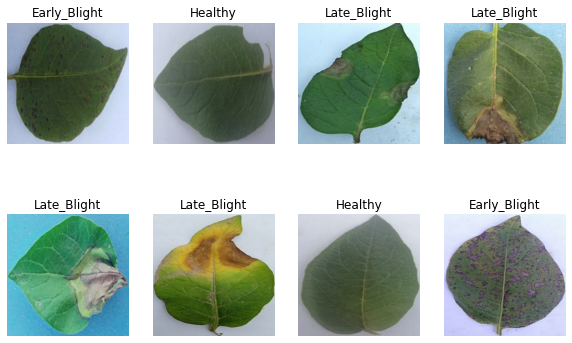

In [6]:
plt.figure(figsize=(10,10))
for image_batch,label_batch in training_dataset.take(1):
    for i in range(0,8):
        plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint32"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

#### Shuffle and prefetch the images

In [7]:
train_data = training_dataset.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
valid_data = validation_dataset.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_data = testing_dataset.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

## Build the model

In [8]:
resize_scale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [9]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

In [10]:
input_shape = (32, IMAGE_SIZE, IMAGE_SIZE, 3)

model = tf.keras.Sequential([
    resize_scale,
    data_augmentation,
    layers.Conv2D(32,(3,3),activation='relu',input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(len(class_names),activation='softmax'),
])
model.build(input_shape=input_shape)

In [11]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (32, 256, 256, 3)         0         
_________________________________________________________________
sequential_1 (Sequential)    (32, 256, 256, 3)         0         
_________________________________________________________________
conv2d (Conv2D)              (32, 254, 254, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (32, 127, 127, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (32, 125, 125, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (32, 62, 62, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (32, 60, 60, 64)         

In [12]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [13]:
model.fit(
    training_dataset,
    epochs=50,
    batch_size=32,
    verbose=1,
    validation_data=validation_dataset
)

Epoch 1/50
102/102 [==============================] - 17s 83ms/step - loss: 0.9933 - accuracy: 0.4934 - val_loss: 0.8589 - val_accuracy: 0.6346
Epoch 2/50
102/102 [==============================] - 6s 53ms/step - loss: 0.7375 - accuracy: 0.6915 - val_loss: 0.6126 - val_accuracy: 0.7620
Epoch 3/50
102/102 [==============================] - 6s 56ms/step - loss: 0.4975 - accuracy: 0.7967 - val_loss: 0.3971 - val_accuracy: 0.8510
Epoch 4/50
102/102 [==============================] - 6s 61ms/step - loss: 0.3436 - accuracy: 0.8693 - val_loss: 0.3604 - val_accuracy: 0.8582
Epoch 5/50
102/102 [==============================] - 6s 56ms/step - loss: 0.2759 - accuracy: 0.9000 - val_loss: 0.2801 - val_accuracy: 0.8726
Epoch 6/50
102/102 [==============================] - 6s 54ms/step - loss: 0.2227 - accuracy: 0.9203 - val_loss: 0.1473 - val_accuracy: 0.9471
Epoch 7/50
102/102 [==============================] - 6s 57ms/step - loss: 0.2097 - accuracy: 0.9225 - val_loss: 0.1896 - val_accuracy: 0.942

In [14]:
model.evaluate(test_data)

13/13 [==============================] - 1s 13ms/step - loss: 0.0599 - accuracy: 0.9753


[0.05985133349895477, 0.9753086566925049]

The Image Title :  Healthy
Model Predicted label :  Healthy


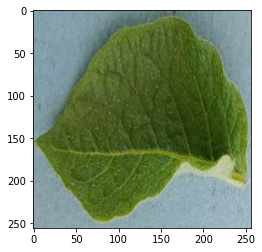

In [15]:
for image_batch,label_batch in test_data.take(1):
    plt.imshow(image_batch[0].numpy().astype("uint8"))
    print("The Image Title : ",class_names[label_batch[0].numpy()])
    prediction = model.predict(image_batch)
    print("Model Predicted label : ",class_names[np.argmax(prediction[0])])